# imshow .vs. pcolor .vs. pcolormesh

## matplotlib.pyplot.imshow

matplotlib.pyplot.imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None,vmax=None, origin=None,extent=None, shape=None,filternorm=1,filterrad=4.0, imlim=None,resample=None, url=None, hold=None, data=None, **kwargs)

显示图像

 * X: array_like,shape(n,m)or (n,m,3) or (n,m,4)。需要显示的数组X。x可能是一个数组或PIL图像。
  * MxN 基于norm和cmap映射到颜色的数组，[0,1]浮点数或者[0,255]整数，超出范围将根据边界截断
  * MxNx3 RGB（float or uint8)
  * MxNx4 RGBA(float or uint8)
 
 * cmap： colormap,如果None，缺省使用rc的image.cmap值。如果x是3维，cmap被忽略。
 * norm: Normalize实例，如果None，使用缺省函数normalize。如果norm是NoNorm实例，x必须是可以直接索引cmap查询表的整数数组。
 * vmin,vmax: vmin和vmax用于和norm一起归一化亮度数据。注意如果传递一个norm实例，vmin和vmax设置被忽略。
 * interpolation: 可接受值是'none','neareset','bilnear'...。如果None，缺省是rc image.interpolation.
 * origin: ['upper'|'lower']，数组[0,0]索引位置是左上角还是左下角。如果None，缺省rc image.origin
 * extent: scalars(left,right,bottom,top)，数据坐标中左下角和右上角的位置。除非extent使用，像素中心定位在整数坐标上。换句话说，origin与像素(0,0)中心一致。
 

[[ 0.93795312  0.24664205  0.29071132]
 [ 0.35882472  0.82112224  0.46759278]
 [ 0.4927038   0.28782148  0.0369229 ]]


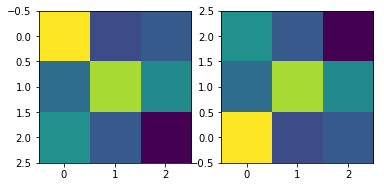

In [12]:
import numpy as np
import matplotlib.pyplot as plt

data = np.random.rand(3,3)
print data
plt.figure(1)
plt.subplot(121)
plt.imshow(data, interpolation='none')
plt.subplot(122)
plt.imshow(data, interpolation='none', origin='lower')
plt.show()

imshow遵从图像处理领域约定：origin原点在左上角。我们可以通过origin参数修改这一设置。像素中心在0,1,2位置上。

## matplotlib.pyplot.pcolor

创建2维数组的伪颜色图。

调用方式：

```
pcolor(C, **kwargs)
pcolor(X, Y, C, **kwargs)
```

pcolor对于大数组非常慢，考虑使用类似但更快的pcolormesh()。

 * C: 颜色值的数组
 * X,Y: 如果给定X，Y，指定颜色四边形的(x,y)坐标。对于C[i,j]四个角是
 
 ```
     (X[i,   j], Y[i,   j])
     (X[i,   j+1], Y[i, j+1])
     (X[i+1, j], Y[i+1, j])
     (X[i+1, j+1], Y[i+1, j+1])
 ```
 
 理想情况下，X和Y的维数应该比C维数多1，如果维数大小相同，C的最后一行和列被忽略。
 
 注意网格方向遵循Matlab约定：形如(nrows, ncolumns)的C绘图列索引对应x坐标，行索引对应y。即c被当作c(y,x)。
 
 如果x和y是一维数组，会被扩展维2维数组，形成矩形网格。
 
 * cmap
 * norm
 * vmin,vmax
 * edgecolors
 * alpha
 * snap
 * ...
 

[[ 0.19334327  0.29688731  0.25044187]
 [ 0.48340411  0.31526496  0.06820453]
 [ 0.20009127  0.62563268  0.02377064]
 [ 0.23136938  0.86986456  0.23762708]
 [ 0.91828837  0.58259801  0.39592285]]


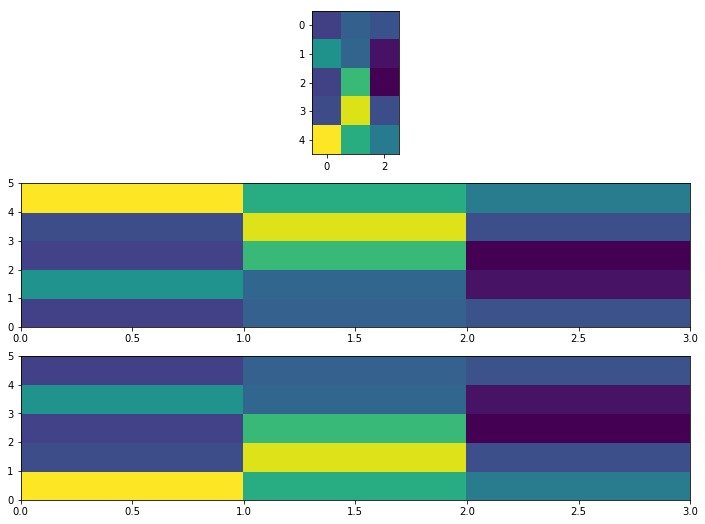

In [20]:
import numpy as np
import matplotlib.pyplot as plt

data = np.random.rand(5,3)
print data
plt.figure(figsize=(12,9))
plt.subplot(311)
plt.imshow(data, interpolation='none')
plt.subplot(312)
plt.pcolor(data)
plt.subplot(313)
plt.pcolor(np.flipud(data)) #flipud 矩阵的上下翻转
plt.show()

从上图对比可以看出，imshow与pcolor的区别：

1. imshow缺省原点是左上角，而pcolor是左下角
2. imshow每个data点用正方形表示，而pcolor是用矩形表示
3. imshow像素位置在0,1,2坐标上，而pcolor像素位置在整数坐标之间

### Masked Array

X,Y和C可以是掩码数组。如果C[i,j]或者围绕C[i,j]的顶点（[i,j],[i+1,j],[i,j+1],[i+1,j+1]）中的一个是掩码，就不画。

[[-- -- 0.7317065644560823 -- -- -- 0.9714859539404902 --]
 [0.775627636363634 -- -- 0.7843151083795495 -- 0.6854482831153219 -- --]
 [0.8929501279549888 -- 0.76391176286579 -- -- -- 0.8207620174273272 --]
 [-- -- 0.7541026465326369 -- -- -- -- --]
 [-- -- -- -- 0.9307503073575137 -- -- 0.834253103474704]
 [-- 0.7749494821148051 0.9700884730287692 -- -- 0.606629112934492
  0.8689586412049763 0.6622251257869413]
 [-- -- 0.8294100210464639 0.934454718554899 0.9820487720899626
  0.6093233914174445 -- 0.571897349253165]
 [-- 0.6119316395641637 -- -- -- 0.5898236420914262 0.793736340972867
  0.8369173182750724]]


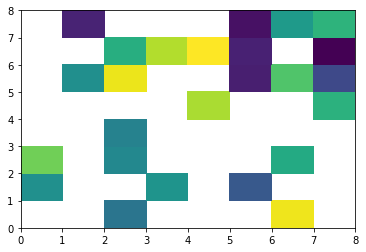

In [22]:
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt

data = np.random.rand(8,8)
data_ma = ma.masked_where(data<0.5, data)
print data_ma

plt.pcolor(data_ma) 
plt.show()

## matplotlib.pyplot.pcolormesh

类似pcolor(),创建2维数组的伪颜色图。两者区别在于返回对象不同，pcolor返回PolyCollection，而pcolormesh返回QuadMesh，速度更快。

调用方式：

```
pcolormesh(C)
pcolormesh(X, Y, C)
pcolormesh(C, **kwargs)
```

C可以是masked数组，但X和Y不可以。masked数组支持实现通过cmap和norm，而pcolor仅仅是不能画掩码颜色的四边形。
 